<a href="https://colab.research.google.com/github/johnsDevassy/Worked_Projects/blob/master/Twitter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy
import sys,tweepy
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import nltk
from nltk.corpus import stopwords

def removepun_emo_nl(twee):
  twee  = re.sub(r"http\S+", "", twee)
  twee= re.sub(r"@\S+", "", twee)
  twee.replace('\n','')
  rt=['rt']
  twee=" ".join([word for word in twee.split() if word.lower() not in rt ])
  twee=twee.lower()
  newt=''
  samp='abcdefghijklmnopqrstuvwxyz '
  for char in twee:
    if char in samp:
      newt+=char
  return newt

In [ ]:
apikey=""
apikeysec=""
api_token=""
beart=""
accesstoken=""
accesstokensec=""

In [ ]:
def getauth():
  auth=tweepy.OAuthHandler(apikey,apikeysec)
  auth.set_access_token(accesstoken,accesstokensec)
  return auth
  

In [ ]:
auth=getauth()
client=tweepy.API(auth,wait_on_rate_limit = True)

df = pd.DataFrame(columns=['text'])
msgs = []
msg =[]


In [ ]:
for tweet in tweepy.Cursor(client.search,q='#covid -filter:retweets',rpp=100,lang='en').items(1000):
  if not tweet.retweeted and ( "RT @" not in tweet.text):
    msg = tweet.text
    print(msg)
    msgs.append(msg)

In [ ]:
TotalTweets=msgs
len(TotalTweets)

1000

In [ ]:
for i in range(len(TotalTweets)):
  TotalTweets[i]=removepun_emo_nl(TotalTweets[i])


In [ ]:
texttweets=[t for t in TotalTweets]

In [ ]:
texttweets

In [ ]:
#We retrieve real time tweets and cleaned it
#Now we can create a model using the given dataset 
#we train the model with the given dataset and we test the model using real time tweets

In [ ]:
covidset=pd.read_csv('/content/drive/My Drive/datasets/sentiment.csv')


In [ ]:
tester=covidset.drop(columns={'Text_Id','Date','Location'})
tester=tester.iloc[0:30000,:]

In [ ]:
print(tester['Sentiments'][2])

0.35


In [ ]:
tester.loc[tester['Sentiments']>0 , 'Sentiments']=1
tester.loc[tester['Sentiments']<0 , 'Sentiments']=-1
tester

In [ ]:
tester=tester.dropna()

In [ ]:
tester=tester.reset_index()

In [ ]:
#lets preprocess txt
for i in range(0,24510):
  tester['Text'][i]=removepun_emo_nl(tester['Text'][i])
  print(tester['Text'][i],str(i))

In [ ]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vocabmaker=tester['Text']
vocabmaker=vocabmaker.append(pd.Series(texttweets))

In [ ]:


def message_cleaning(message):
    Test_punc_removed_join_clean = [word for word in message.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning,dtype = 'uint8').fit_transform(vocabmaker).toarray()
#we create the vector of word not only with the given dataset . But also with the tweets we retrieved real time.

In [ ]:
tweets_countvectorizer.shape

(25510, 18982)

In [ ]:
tweets = pd.DataFrame(tweets_countvectorizer[:24510])
X=tweets

In [ ]:
outtweets=pd.DataFrame(tweets_countvectorizer[24510:])

In [ ]:
y = tester['Sentiments']

In [ ]:
X

In [ ]:
#Splitting into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

              precision    recall  f1-score   support

        -1.0       0.81      0.84      0.82       536
         0.0       0.92      0.82      0.86       956
         1.0       0.84      0.91      0.87       959

    accuracy                           0.86      2451
   macro avg       0.85      0.86      0.85      2451
weighted avg       0.86      0.86      0.86      2451



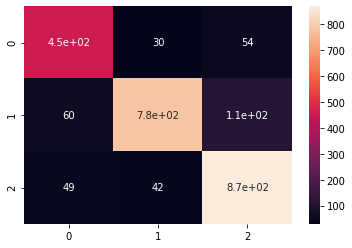

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))



In [ ]:
#lets do with some real tweets
#We already trained and tested our model on given dataset . Now we can test it on the Real time Tweets

In [ ]:
y_predict_test = NB_classifier.predict(outtweets)


In [ ]:
for i in range(1000):
  print(texttweets[i],y_predict_test[i])

ive started writing the second book in the kenny hughes memorial trilogy lost in lockdown is expected to be publi -1.0
kamala said covid was airborne science says masks or lockdowns d 0.0
some marxist film critics consider the fly jeff goldblum version to be an aids parable pencesfly covid pencepinkeye -1.0
 pence was dismissive to kamalaharris and the moderator  pence lied through his teeth calmly  whatever  -1.0
i know you need to hear this if your main talking point is that trump has been the best president ever for black a 1.0
almost done with the ocean first the orbs then the towerstreamer then whatever comes next 1.0
cdc changes its mind again covid is sometimes airborne  survival  before its news 1.0
better way than handshakes to seal the deal become a superpro today  business 1.0
i wonder if will be monitoring  twitter account for antivaxer propaganda aft -1.0
almost done with the ocean first the orbs then the towerstreamer then whatever comes next 1.0
valentina was a visionary